In [59]:
import numpy as np
print('numpy version:', np.__version__)

import matplotlib as mpl
print('matplotlib version:', mpl.__version__)
import matplotlib.pyplot as plt

import scipy
import statsmodels.api as sm
print('statsmodels version:', sm.__version__)


numpy version: 1.23.5
matplotlib version: 3.6.2
statsmodels version: 0.13.5


In [2]:
X = np.array([[0., -6.], [4., 4.],[0., 0.], [-5., 2.]])
clust_centers = np.array([[-5., 2.], [0., -6.]])

In [7]:
def dist_l2(A, B):
    """
    Returns Euclidean distance between points A and B
    """
    return np.sqrt(((A - B)**2).sum())

In [8]:
def dist_l1(A, B):
    return np.abs(A - B).sum()

In [9]:
distances_l1 = np.array(
    [[dist_l1(X[i, :], X[j, :]) for j in range(X.shape[0])] for i in range(X.shape[0])]
)
distances_l1

array([[ 0., 14.,  6., 13.],
       [14.,  0.,  8., 11.],
       [ 6.,  8.,  0.,  7.],
       [13., 11.,  7.,  0.]])

In [10]:
distances_l2 = np.array(
    [[dist_l2(X[i, :], X[j, :]) for j in range(X.shape[0])] for i in range(X.shape[0])]
)
distances_l2

array([[ 0.        , 10.77032961,  6.        ,  9.43398113],
       [10.77032961,  0.        ,  5.65685425,  9.21954446],
       [ 6.        ,  5.65685425,  0.        ,  5.38516481],
       [ 9.43398113,  9.21954446,  5.38516481,  0.        ]])

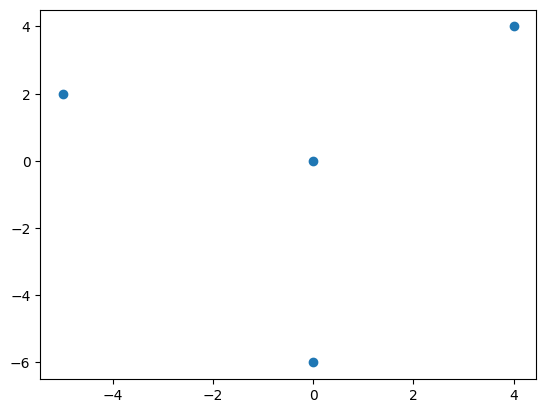

In [11]:
plt.scatter(X[:, 0], X[:, 1])
plt.scatter

In [12]:
centroid = np.array([0., 2.])
np.array([dist_l1(centroid, X[i, :]) for i in range(X.shape[0])])

array([8., 6., 2., 5.])

In [13]:
np.array([dist_l1(X[0, :], X[i, :]) for i in range(X.shape[0])])

array([ 0., 14.,  6., 13.])

In [14]:
np.median(np.array([0., 4.]))

2.0

In [17]:
np.array([[dist_l1(X[i, :], clust_centers[j, :]) for j in range(clust_centers.shape[0])] for i in range(X.shape[0])])

array([[13.,  0.],
       [11., 14.],
       [ 7.,  6.],
       [ 0., 13.]])

In [18]:
clust_centers = np.array([[-0.5, 3], [0, 3]])
np.array([[dist_l1(X[i, :], clust_centers[j, :]) for j in range(clust_centers.shape[0])] for i in range(X.shape[0])])

array([[9.5, 9. ],
       [5.5, 5. ],
       [3.5, 3. ],
       [5.5, 6. ]])

In [20]:
np.median(np.array([-6,0.,4.]))

0.0

In [21]:
clust_centers = np.array([[-5., 2.], [0., 0.]])
np.array([[dist_l1(X[i, :], clust_centers[j, :]) for j in range(clust_centers.shape[0])] for i in range(X.shape[0])])

array([[13.,  6.],
       [11.,  8.],
       [ 7.,  0.],
       [ 0.,  7.]])

### Maximum Likelyhood Estimation

Consider a general multinomial distribution with parameters $\theta$. Recall that the likelihood of a dataset _D_ is given by:
$$
P(D | \theta) = \prod_{i=1}^{|\theta|}{\theta_i^{c_i}}
$$
where $c_i$ in the number of occurences of i-th event
The MLE of $\theta$ is the setting of $\theta^*$ that maximizes $P(D|\theta)$. In lecture we derived this to be
$$
\theta_i^* = \frac{c_i}{\sum_{j=1}^{|\theta^*|}{c_j}}
$$

#### Unigram model 

In [25]:
sequence = 'ABABBCABAABCAC'
theta_A = sequence.count('A') / len(sequence)
theta_B = sequence.count('B') / len(sequence)
theta_C = sequence.count('C') / len(sequence)
print(f'A: {theta_A:.4f}, B: {theta_B:.4f}, C: {theta_C:.4f}')

A: 0.4286, B: 0.3571, C: 0.2143


In [26]:
def get_mle_unigram(sequence, vocab=None):
    if vocab is None:
        res = {}
    else:
        res = dict.fromkeys(vocab, 0)
    for c in sequence:
        res[c] = sequence.count(c) / len(sequence)
    return res

In [27]:
theta = get_mle_unigram(sequence=sequence)
print(theta)

{'A': 0.42857142857142855, 'B': 0.35714285714285715, 'C': 0.21428571428571427}


In [28]:
def get_sequence_proba(sequence, theta):
    res = 1
    for c in sequence:
        res *= theta[c]
    return res

In [29]:
get_sequence_proba('ABC', theta=theta)

0.03279883381924198

In [30]:
get_sequence_proba('BBB', theta=theta)

0.04555393586005831

In [31]:
get_sequence_proba('ABB', theta=theta)

0.05466472303206997

In [32]:
get_sequence_proba('AAC', theta=theta)

0.039358600583090375

#### Bigram model

A bigram model computes the probability $P(D|\theta)$ as:
$$
P(D|\theta) = p(w_0) \prod_{w_1, w_2 \in D}{p(w_2|w_1)}
$$
where $w_0$ is the first word, and $(w_1, w_2)$ is a pair of consecutive words in the document.

In [33]:
sequence_init = ''.join('A B A B B C A B A A B C A C'.split(' '))
sequence_target = ''.join('A A B C B A B'.split(' '))

In [38]:
sequence_init

'ABABBCABAABCAC'

For bigram model we have to evaluate probabilities of A|A, B|A, A|B, B|B, A|C, B|C. Other probabilities can be calculated via p(C|A) = 1 - (p(A|A) + p(B|A)) as no other variants exist.  
Also conditional probability $p(w_2|w_1)$ calculates as
$$
p(w_2|w_1) = \frac{count(w_1, w_2)}{\sum_{w_1, w_2^{'} \in D}{count(w_1, w_2^{'})}}
$$
i.e. count of specified bigram divided over the count of all bigrams which begin with same word

In [39]:
freq = {}
for i in range(len(sequence_init)-1):
    if freq.get(sequence_init[i:i+2]) is None:
        freq[sequence_init[i:i+2]] = 1
    else:
        freq[sequence_init[i:i+2]] += 1
print(freq)

{'AB': 4, 'BA': 2, 'BB': 1, 'BC': 2, 'CA': 2, 'AA': 1, 'AC': 1}


In [42]:
bigram_prob = {}
for bigram in freq.keys():
    sum = 0
    for check in freq.keys():
        if (check[0] == bigram[0]):
            sum += freq[check]
    if sum == 0:
        bigram_prob[bigram] = 1.0
    else:
        bigram_prob[bigram] = freq[bigram] / sum
bigram_prob

{'AB': 0.6666666666666666,
 'BA': 0.4,
 'BB': 0.2,
 'BC': 0.4,
 'CA': 1.0,
 'AA': 0.16666666666666666,
 'AC': 0.16666666666666666}

In [43]:
# check correctness
bigram_prob['AA']+bigram_prob['AB']+bigram_prob['AC']

0.9999999999999999

### EM algorithm

We have mixture of Gaussians: $p(x|\theta) = \pi_1 N(x|\mu_1, \sigma_1^2) + \pi_2 N(x|\mu_2, \sigma_2^2)$. The mixture parameters initialized as: $\theta = \{ \pi_1, \pi_2, \mu_1, \mu_2, \sigma_1^2, \sigma_2^2 \} = \{ 0.5, 0.5, 6, 7, 1, 4 \}$  
Dataset D has the following samples: $D = \{ x^{(0)}=-1, x^{(1)}=0, x^{(2)}=4, x^{(3)}=5, x^{(4)}=6 \}$  
We want to set parameters $\theta$ such that the data log-likelyhood $l(D|\theta)$ was maximized
$$
l(D|\theta) = \argmax_{\theta} \sum_{i=1}^N{\log {p(x^{(i)}|\theta)}}
$$

What is the log-likelihood of the data given the initial setting of $\theta$? Round to the nearest tenth

In [52]:
def get_gaussian_proba(x, weights, mu, sigma_sq):
    return weights * np.exp(-((x.reshape(-1, 1) - mu) ** 2) / (2 * sigma_sq)) / ((2 * np.pi * sigma_sq)**0.5)

In [49]:
X = np.array([-1., 0., 4., 5., 6.])
weights = np.array([.5, .5])
mus = np.array([6., 7.])
sigmas_sq = np.array([1., 4.])

In [57]:
np.log(get_gaussian_proba(X, weights=weights, mu=mus, sigma_sq=sigmas_sq).sum(axis=1)).sum()

-24.512532330086678

In [60]:
get_gaussian_proba(X, weights=weights, mu=mus, sigma_sq=sigmas_sq)

array([[4.56736020e-12, 3.34575564e-05],
       [3.03794142e-09, 2.18170674e-04],
       [2.69954833e-02, 3.23793989e-02],
       [1.20985362e-01, 6.04926811e-02],
       [1.99471140e-01, 8.80163317e-02]])

In [62]:
scipy.stats.norm.pdf(X, mus[0], sigmas_sq[0]).reshape(-1, 1) * weights[0]

array([[4.56736020e-12],
       [3.03794142e-09],
       [2.69954833e-02],
       [1.20985362e-01],
       [1.99471140e-01]])

In [65]:
# why are these results not consistent with those I got by applying self-made function?
# in previous cell all is ok
scipy.stats.norm.pdf(X, mus[1], sigmas_sq[1]).reshape(-1, 1) * weights[1]

array([[0.00674887],
       [0.01078466],
       [0.03764218],
       [0.04400817],
       [0.04833351]])

In [74]:
# E-step #1
tmp = get_gaussian_proba(X, weights=weights, mu=mus, sigma_sq=sigmas_sq)
p_ji = tmp / tmp.sum(axis=1).reshape(-1, 1)
p_ji

array([[1.36512049e-07, 9.99999863e-01],
       [1.39244156e-05, 9.99986076e-01],
       [4.54661673e-01, 5.45338327e-01],
       [6.66666667e-01, 3.33333333e-01],
       [6.93842896e-01, 3.06157104e-01]])

In [80]:
# M-step #1
n_hat = p_ji.sum(axis=0)
n_hat

array([1.8151853, 3.1848147])

In [82]:
weights_hat = n_hat / X.shape[0]
weights_hat

array([0.36303706, 0.63696294])

In [87]:
mus_hat = (p_ji * X.reshape(-1, 1)).sum(axis=0) / n_hat
mus_hat

array([5.13172803, 1.47103149])

In [93]:
sigmas_sq_hat = (((X.reshape(-1, 1) - mus_hat)**2)*p_ji).sum(axis=0) / n_hat
sigmas_sq_hat

array([0.6155625, 6.9670221])